In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [4]:
# Load dataset
df = pd.read_excel("C:/Users/SAPTARSHI/Downloads/red_light_violation.xlsx")

In [5]:
# Drop irrelevant columns data filtering
df_cleaned = df.drop(columns=["Timestamp", "Name", "Email"], errors='ignore')

In [6]:
# Encode target variable (Yes -> 1, No -> 0)
df_cleaned["RedLightViolation"] = df_cleaned["Have you ever crossed the street during a red light?"].map({"Yes": 1, "No": 0})

In [7]:
# Drop original target column
df_cleaned = df_cleaned.drop(columns=["Have you ever crossed the street during a red light?"], errors='ignore')

In [8]:
# Define column groups
demographic_cols = ["Age Group", "Gender", "Occupation", "Approximate monthly income of the person who violates traffic signals", "Education level"]
psychological_cols = ["How often do your friends describe you as argumentative?", "Do you openly express disagreement with your friends?", "Do you find yourself getting into arguments when people disagree with you?", "Do you get into physical fights more frequently than the average person?", "Have you ever been so angry that you broke something?"]
driving_experience_cols = ["Driving Experience", "How many hours a day do you usually drive?"]
traffic_external_cols = ["In which areas do you think red light violations are more of a problem?", "What are the main reasons that make you more likely to cross during a red light?", "Do you believe that adding countdown timers to traffic lights would reduce red light violations?", "What strategies or policies might make you less likely to run a red light?"]
perception_cols = ["How do you react when you see someone running a red light?", "When do you believe red light violations are most common?", "Which type of vehicle is more likely to violate red light?", "Which type of intersections do you believe is most prone to red light violations?", "What type of public awareness campaign would be most likely to influence your driving behaviour regarding red light running?"]


In [9]:
# Combine all features
all_features = demographic_cols + psychological_cols + driving_experience_cols + traffic_external_cols + perception_cols

In [10]:
# Preprocess data
def preprocess_data(selected_cols):
    X_factor = df_cleaned[selected_cols].copy()
    X_factor_encoded = pd.get_dummies(X_factor, drop_first=True)
    imputer = SimpleImputer(strategy="most_frequent")
    X_factor_imputed = pd.DataFrame(imputer.fit_transform(X_factor_encoded), columns=X_factor_encoded.columns)
    return X_factor_imputed


In [13]:
print(df_cleaned.columns)

Index(['Age Group', 'Gender', 'Occupation',
       'Approximate monthly income of the person who violates traffic signals\n',
       'Education level\n', 'Driving Experience',
       'How often do your friends describe you as argumentative?',
       'Do you openly express disagreement with your friends?',
       'Do you find yourself getting into arguments when people disagree with you?',
       'Do you get into physical fights more frequently than the average person?',
       'Have you ever been so angry that you broke something?',
       'How do you react when you see someone running a red light?',
       'How many hours a day do you usually drive?',
       'In which areas do you think red light violations are more of a problem ?',
       'What are the main reasons that make you more likely to cross during a red light?',
       'Do you believe that adding countdown timers to traffic lights would reduce red light violations?\n',
       'What strategies or policies might make you less 

In [14]:
missing_cols = [col for col in all_features if col not in df_cleaned.columns]
print("Missing columns:", missing_cols)

Missing columns: ['Approximate monthly income of the person who violates traffic signals', 'Education level', 'In which areas do you think red light violations are more of a problem?', 'Do you believe that adding countdown timers to traffic lights would reduce red light violations?', 'What strategies or policies might make you less likely to run a red light?', 'What type of public awareness campaign would be most likely to influence your driving behaviour regarding red light running?']


In [21]:
def preprocess_data(selected_cols):
    existing_cols = [col for col in selected_cols if col in df_cleaned.columns]  # Keep only valid columns
    missing_cols = [col for col in selected_cols if col not in df_cleaned.columns]  # Identify missing columns

    if missing_cols:
        print("Warning: The following columns are missing and will be ignored:", missing_cols)

    X_factor = df_cleaned[existing_cols].copy()
    X_factor_encoded = pd.get_dummies(X_factor, drop_first=True)
    imputer = SimpleImputer(strategy="most_frequent")
    X_factor_imputed = pd.DataFrame(imputer.fit_transform(X_factor_encoded), columns=X_factor_encoded.columns)

    return X_factor_imputed


In [22]:
X_all = preprocess_data(all_features)


C:\Users\SAPTARSHI\anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)


In [23]:
# Prepare data for full model
X_all = preprocess_data(all_features)
y = df_cleaned["RedLightViolation"]

C:\Users\SAPTARSHI\anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)


In [24]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_all, y, test_size=0.2, random_state=42)

In [25]:
# Define and train logistic regression model
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(max_iter=500))
])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', LogisticRegression(max_iter=500))])

In [26]:
# predictions
y_pred = pipeline.predict(X_test)

In [27]:
# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

In [28]:
print(f"Accuracy: {accuracy:.4f}\n")

Accuracy: 0.8750



In [29]:
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.90      0.91       115
           1       0.77      0.80      0.78        45

    accuracy                           0.88       160
   macro avg       0.84      0.85      0.85       160
weighted avg       0.88      0.88      0.88       160



In [37]:
def train_and_plot_confusion_matrix(feature_group, group_name):
    X = preprocess_data(feature_group)
    y = df_cleaned["RedLightViolation"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', LogisticRegression(max_iter=500))
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    cm = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {group_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

C:\Users\SAPTARSHI\anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)


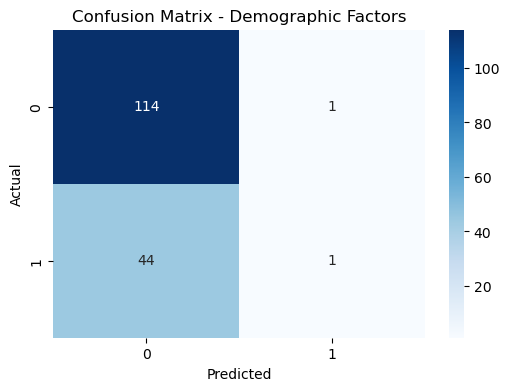

C:\Users\SAPTARSHI\anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)


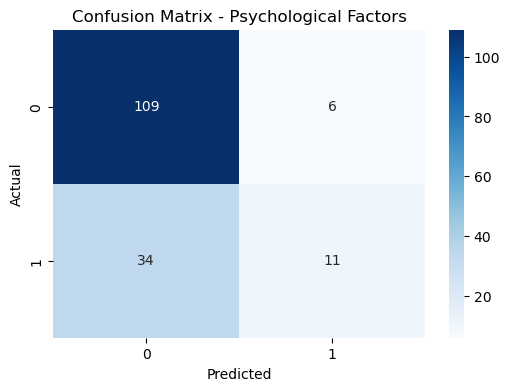

C:\Users\SAPTARSHI\anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)


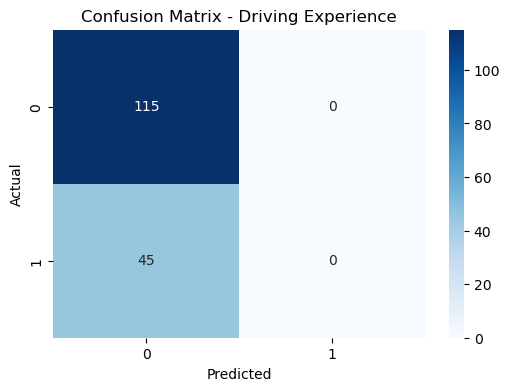

C:\Users\SAPTARSHI\anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)


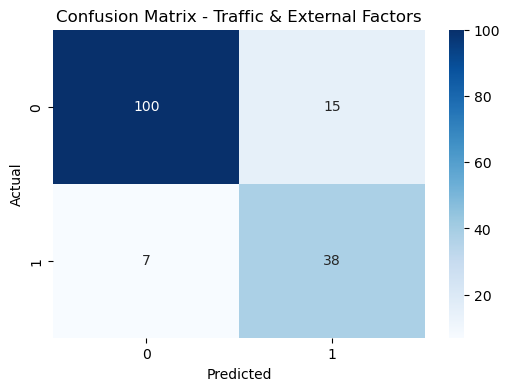

C:\Users\SAPTARSHI\anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)


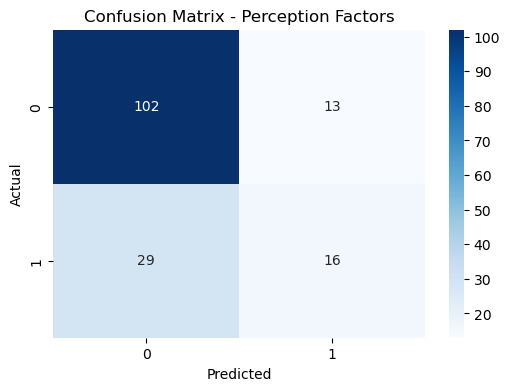

In [38]:
train_and_plot_confusion_matrix(demographic_cols, "Demographic Factors")
train_and_plot_confusion_matrix(psychological_cols, "Psychological Factors")
train_and_plot_confusion_matrix(driving_experience_cols, "Driving Experience")
train_and_plot_confusion_matrix(traffic_external_cols, "Traffic & External Factors")
train_and_plot_confusion_matrix(perception_cols, "Perception Factors")

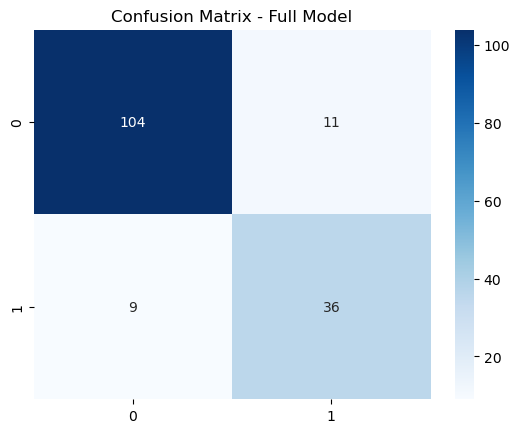

In [30]:
# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Full Model")
plt.show()

In [31]:
# Feature Importance Analysis
coefficients = pipeline.named_steps['model'].coef_[0]
feature_names = X_all.columns
feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': coefficients})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

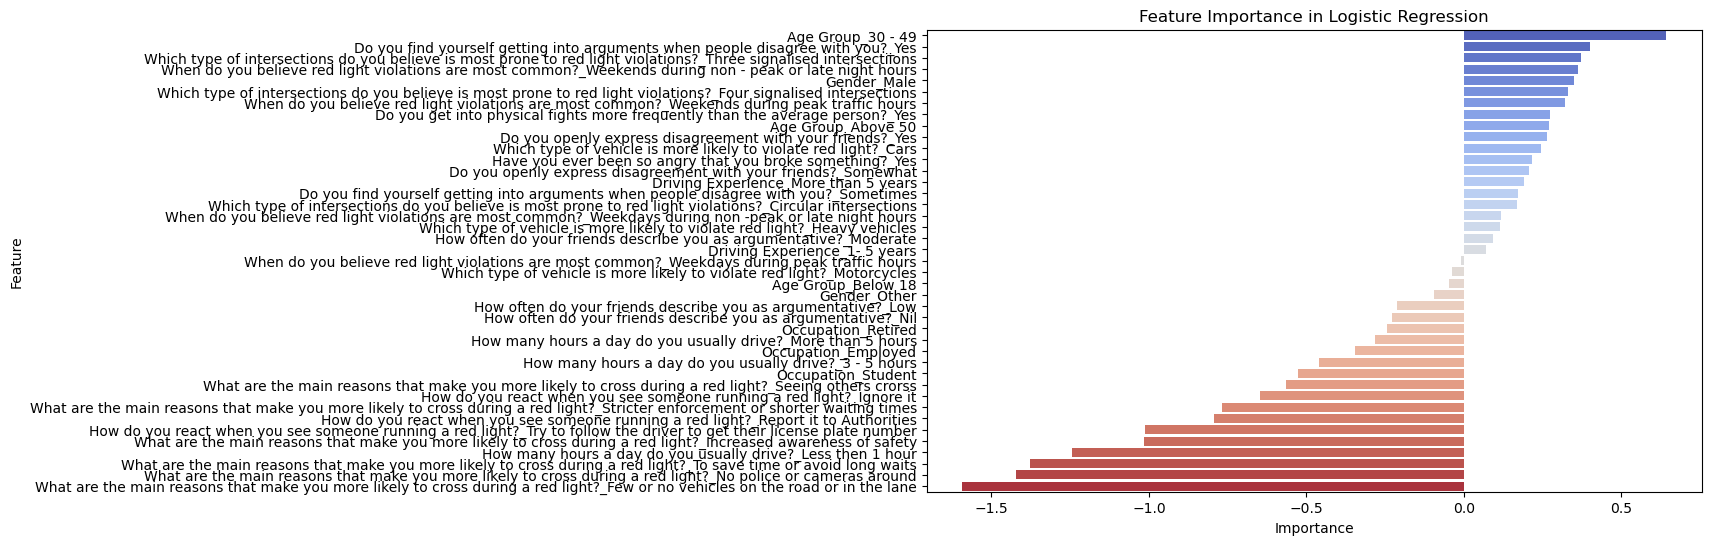

In [32]:
# Plot feature importance
plt.figure(figsize=(10,6))
sns.barplot(x=feature_importance['Importance'], y=feature_importance['Feature'], palette='coolwarm')
plt.title("Feature Importance in Logistic Regression")
plt.show()

In [33]:
# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

In [34]:
param_grid = {'model__C': [0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model',
                                        LogisticRegression(max_iter=500))]),
             param_grid={'model__C': [0.01, 0.1, 1, 10, 100]},
             scoring='accuracy')

In [35]:
print(f"Best Parameters: {grid_search.best_params_}")

Best Parameters: {'model__C': 0.1}


In [39]:
print(f"Best Accuracy: {grid_search.best_score_:.4f}")

Best Accuracy: 0.9234
